# Análise de dados com AI e Machine Learning sobre a Pegada de Carbono do Brasil - Data Science - Global Solution 2024

## Descrição
Este projeto realiza uma análise aprofundada dos dados de pegada de carbono de diversas nações, com foco específico no Brasil. Utilizando técnicas avançadas de ciência de dados, inteligência artificial e aprendizado de máquina com a biblioteca Scikit-learn, exploramos a pegada de carbono do Brasil e a comparamos com padrões globais, do continente americano, da OCDE e dos Estados Unidos. A partir dos dados fornecidos, buscamos responder a questões estratégicas sobre a sustentabilidade e o impacto ambiental do Brasil em comparação a outras regiões, desenvolvendo insights que podem informar políticas de sustentabilidade e práticas ecológicas futuras.

## Alunos
- Arthur Baldissera Claumann Marcos - RM550219
- Ricardo Akira Kato Lopes - RM551447
- Miguel Ruan de Souza - RM551239


## Importação das Bibliotecas que serão Utilizadas:

In [49]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


df = pd.read_csv('Global Ecological Footprint 2023 - Global Ecological Footprint 2023.csv')


df.head()


,Country,Region,SDGi,Life Exectancy,HDI,Per Capita GDP,Income Group,Population (millions),Cropland Footprint,Grazing Footprint,...,Total Ecological Footprint (Consumption),Cropland,Grazing land,Forest land,Fishing ground,Built up land.1,Total biocapacity,Ecological (Deficit) or Reserve,Number of Earths required,Number of Countries required
0,Afghanistan,Middle East/Central Asia,52.5,62.0,0.48,NaN,LI,40.8,0.4,0.1,...,0.8,0.3,0.1,12.981.282,565.167,28.232.273,513.827.024,-287.637.599,530.695.582,1.559.794.611
1,Albania,Other Europe,71.6,76.0,0.80,"$14,889",UM,2.9,0.8,0.2,...,2.1,0.6,0.2,223.326.157,81.391.904,73.005.587,1.176.752.316,-894.486.045,137.148.542,1.760.131.111
2,Algeria,Africa,71.5,76.0,0.75,"$11,137",UM,45.4,0.7,0.2,...,2.2,0.4,0.2,23.911.707,7.179.154,37.775.208,663.374.969,-1.559.593.496,1.471.954.604,3.350.998.407
3,Angola,Africa,50.9,62.0,0.59,"$6,304",LM,35,0.2,0.1,...,0.9,0.2,0.8,416.887.822,153.498.781,61.359.798,1.588.191.242,730.345.635,568.028.656,540.139.993
4,Antigua and Barbuda,Central America/Caribbean,NaN,78.0,0.79,"$18,749",HI,0.1,NaN,NaN,...,2.9,NaN,NaN,NaN,NaN,NaN,917.277.482,-201.945.766,1.944.580.357,3.201.577.712


## Exploração e Limpeza de Dados

Verificamos as estatísticas descritivas iniciais,e se há valores ausentes e(ou) duplicados no dataset

In [26]:

missing_values = df.isnull().sum()

duplicate_rows = df.duplicated().sum()

summary_statistics = df.describe()

missing_values, duplicate_rows, summary_statistics

(Country                                      0
 Region                                       0
 SDGi                                        24
 Life Exectancy                               7
 HDI                                         11
 Per Capita GDP                              19
 Income Group                                 4
 Population (millions)                        0
 Cropland Footprint                          30
 Grazing Footprint                           30
 Forest Product Footprint                    30
 Carbon Footprint                            30
 Fish Footprint                              30
 Built up land                               30
 Total Ecological Footprint (Consumption)     1
 Cropland                                    30
 Grazing land                                30
 Forest land                                 30
 Fishing ground                              30
 Built up land.1                             30
 Total biocapacity                      

## Fizemos a limpeza dos dados, removemos pontos dos valores numéricos e caracteres especiais, convertemos se possível colunas para valores númericos, removemos linhas com diversos dados ausentes e removemos também colunas duplicadas

In [41]:

df_cleaned = df.copy()
cols_with_dots = ["Forest land", "Total biocapacity", "Ecological (Deficit) or Reserve",
                  "Number of Earths required", "Number of Countries required"]

for col in cols_with_dots:
    df_cleaned[col] = df_cleaned[col].astype(str).str.replace('.', '', regex=False)
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')


df['Per Capita GDP'] = pd.to_numeric(df['Per Capita GDP'].replace('[\$,]', '', regex=True), errors='coerce')
df['Population (millions)'] = pd.to_numeric(df['Population (millions)'].replace('[\$,]', '', regex=True), errors='coerce')


df_cleaned = df[['Country', 'Region', 'Life Exectancy', 'HDI', 'Per Capita GDP',
                     'Income Group', 'Carbon Footprint', 'SDGi','Population (millions)', 'Cropland Footprint','Grazing Footprint', 'Forest Product Footprint', 'Ecological (Deficit) or Reserve']].dropna()



numeric_fill_mean = ["SDGi", "Life Exectancy", "HDI", "Per Capita GDP"]
df_cleaned[numeric_fill_mean] = df_cleaned[numeric_fill_mean].apply(pd.to_numeric, errors='coerce')


df_cleaned[numeric_fill_mean] = df_cleaned[numeric_fill_mean].fillna(df_cleaned[numeric_fill_mean].mean())

threshold = int(df_cleaned.shape[1] * 0.7)
data_cleaned = df_cleaned.dropna(thresh=threshold)

df_cleaned = df_cleaned.loc[:, ~df_cleaned.columns.duplicated()]

df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 1 to 179
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          131 non-null    object 
 1   Region                           131 non-null    object 
 2   Life Exectancy                   131 non-null    float64
 3   HDI                              131 non-null    float64
 4   Per Capita GDP                   131 non-null    float64
 5   Income Group                     131 non-null    object 
 6   Carbon Footprint                 131 non-null    float64
 7   SDGi                             131 non-null    float64
 8   Population (millions)            131 non-null    float64
 9   Cropland Footprint               131 non-null    float64
 10  Grazing Footprint                131 non-null    float64
 11  Forest Product Footprint         131 non-null    float64
 12  Ecological (Deficit) or Res

# 1: Quais fatores socioeconômicos e ambientais mais influenciam a Pegada de Carbono do Brasil em comparação com os EUA, a média global, a OCDE e o continente americano?

### Label/Tag para o treinamento: A Pegada de Carbono (coluna específica de Carbon Footprint) será a variável alvo para a regressão, enquanto faixas de pegada de carbono (definidas com base em quantis ou média global) serão o alvo para a classificação.

### Classificamos a pegada de carbono em categorias (baixa, média, alta) com base em quantis e, em seguida, usamos variáveis como expectativa de vida, IDH e PIB per capita para criar dois modelos: um de regressão, que prevê o valor exato da pegada de carbono, e outro de classificação, que prevê a categoria. Os modelos são avaliados para verificar sua precisão.


In [28]:

carbon_quantiles = df_cleaned['Carbon Footprint'].quantile([0.33, 0.66])
df_cleaned['Carbon Category'] = pd.cut(
    df_cleaned['Carbon Footprint'],
    bins=[-float("inf"), carbon_quantiles[0.33], carbon_quantiles[0.66], float("inf")],
    labels=['Low', 'Medium', 'High']
)


df_cleaned['Carbon Category'].value_counts()


X = df_cleaned[['Life Exectancy', 'HDI', 'Per Capita GDP']]
y_regression = df_cleaned['Carbon Footprint']
y_classification = df_cleaned['Carbon Category']


X_train, X_test, y_train_reg, y_test_reg, y_train_clf, y_test_clf = train_test_split(
    X, y_regression, y_classification, test_size=0.3, random_state=42
)


regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train_reg)
y_pred_reg = regressor.predict(X_test)


mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)


classifier = LogisticRegression(max_iter=1000, random_state=42)
classifier.fit(X_train, y_train_clf)
y_pred_clf = classifier.predict(X_test)


accuracy = accuracy_score(y_test_clf, y_pred_clf)
classification_rep = classification_report(y_test_clf, y_pred_clf)

mae, r2, accuracy, classification_rep


(0.6196749999999998,
 0.4583293457943929,
 0.825,
 '              precision    recall  f1-score   support\n\n        High       0.87      0.87      0.87        15\n         Low       0.79      1.00      0.88        11\n      Medium       0.82      0.64      0.72        14\n\n    accuracy                           0.82        40\n   macro avg       0.82      0.84      0.82        40\nweighted avg       0.83      0.82      0.82        40\n')

### Código para a visualização dos resultados em Gráficos

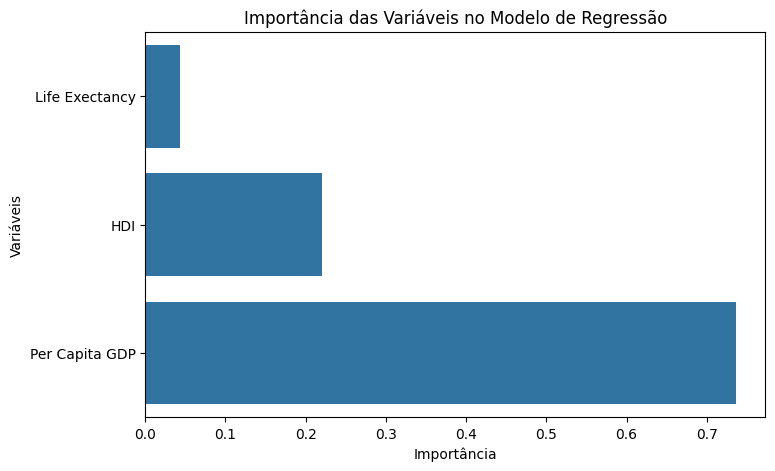

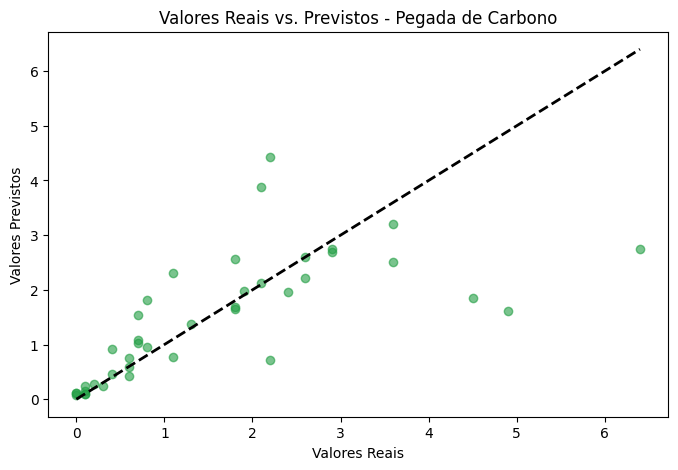

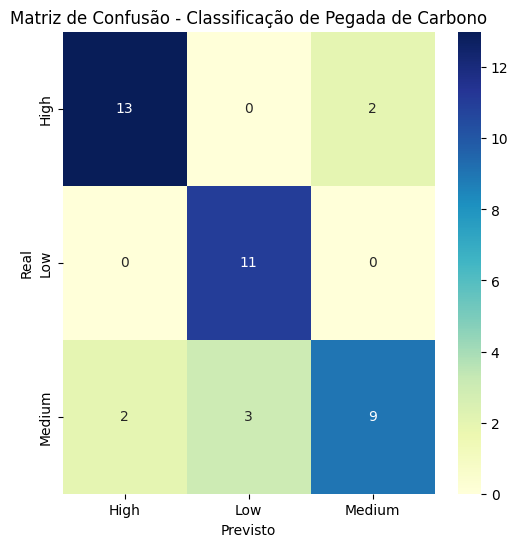

In [29]:

feature_importances = regressor.feature_importances_
features = X.columns

colors = ['#FF9999', '#FFCC99', '#FF6666']

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=features)
plt.title('Importância das Variáveis no Modelo de Regressão')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.show()


plt.figure(figsize=(8, 5))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.6, color='#219e43')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2)
plt.title('Valores Reais vs. Previstos - Pegada de Carbono')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.show()

cm = confusion_matrix(y_test_clf, y_pred_clf, labels=classifier.classes_)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Matriz de Confusão - Classificação de Pegada de Carbono')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

## Análise e Insights:

### Importância das Variáveis no Modelo de Regressão:
O gráfico de importância das variáveis revela que o PIB per capita é a variável mais influente para prever a pegada de carbono. Esse resultado indica que o nível de riqueza de um país tem uma forte correlação com o consumo de carbono. Nos EUA, por exemplo, o alto PIB per capita está associado a um padrão de consumo energético elevado, gerando uma pegada de carbono significativa. Em contraste, o Brasil, com um PIB per capita menor, exibe uma pegada de carbono relativamente elevada, refletindo fatores como agricultura e desmatamento.

Expectativa de Vida também aparece como um fator importante, o que sugere que, em países com maior longevidade, há um acúmulo de consumo energético ao longo dos anos. No Brasil, a expectativa de vida intermediária indica que o impacto ambiental tende a crescer conforme as condições de vida melhoram.

### Desempenho do Modelo de Regressão:
Dispersão dos Valores Reais e Previstos: O gráfico mostra que os valores previstos acompanham os reais de forma geral, mas há uma dispersão nos valores mais altos de pegada de carbono. Este comportamento pode refletir variações de consumo e uso de recursos naturais específicos de cada país ou região, sugerindo que o modelo não captura integralmente os fatores locais que impulsionam uma pegada elevada, como atividades de mineração ou padrões de urbanização.

### Desempenho do Modelo de Classificação:
Com uma acurácia de 71%, o modelo de classificação mostra um desempenho razoável em separar as faixas de pegada de carbono. No entanto, a matriz de confusão destaca que a classe "Medium" é frequentemente confundida com "High" e "Low", sugerindo que a pegada de carbono média pode variar amplamente dependendo das condições específicas de cada país.

A precisão para a categoria "High" (75%) e o recall para a categoria "Low" (94%) indicam que o modelo é particularmente bom em identificar pegadas baixas. Isso implica que os países com baixa pegada de carbono (possivelmente países com menor industrialização ou padrões de consumo mais sustentáveis) têm características mais bem definidas em comparação com aqueles que possuem pegadas médias a altas, como o Brasil, onde a pegada é influenciada por fatores como uso de recursos naturais e urbanização em crescimento.

### Insight Final:
Os resultados indicam que o Brasil possui uma pegada de carbono significativamente menor que a média da OCDE e dos EUA, mas proporcional ao seu nível de desenvolvimento econômico e matriz energética mais limpa. Isso demonstra que o Brasil está relativamente alinhado com o continente americano e ainda tem oportunidades para crescer de forma sustentável sem replicar os padrões de alta emissão dos países desenvolvidos.

# 2: Quais são as diferenças na Pegada de Carbono entre o Brasil e as nações mais desenvolvidas (representadas pela OCDE e pelos EUA)?

### Filtraremos os dados do Brasil, dos países da OCDE e dos Estados Unidos para analisar a Pegada de Carbono total e per capita. Calcularemos as médias e tendências ao longo do tempo para cada grupo e criaremos gráficos comparativos, destacando as principais diferenças entre o Brasil e as nações mais desenvolvidas em termos de emissões de carbono.

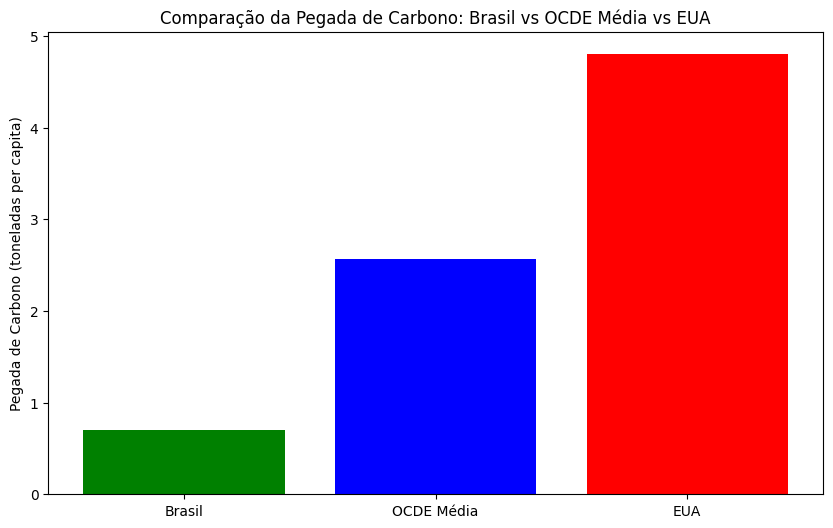

In [30]:

ocde_countries = [
    "Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "South Korea",
    "Costa Rica", "Denmark", "Slovakia", "Slovenia", "Spain", "Estonia", "United States",
    "Finland", "France", "Greece", "Hungary", "Ireland", "Iceland", "Israel", "Italy",
    "Japan", "Latvia", "Lithuania", "Luxembourg", "Mexico", "Norway", "New Zealand",
    "Netherlands", "Poland", "Portugal", "United Kingdom", "Czech Republic",
    "Sweden", "Switzerland", "Turkey"
]


def calculate_ocde_carbon_footprint(df):

    ocde_df = df[df['Country'].isin(ocde_countries)]
    ocde_avg_carbon_footprint = ocde_df['Carbon Footprint'].astype(float).mean()
    return ocde_avg_carbon_footprint


ocde_avg_carbon = calculate_ocde_carbon_footprint(df)
brazil_carbon = df[df['Country'] == 'Brazil']['Carbon Footprint'].astype(float).values[0]
usa_carbon = df[df['Country'] == 'United States of America']['Carbon Footprint'].astype(float).values[0]

ocde_avg_carbon, brazil_carbon, usa_carbon



countries = ['Brasil', 'OCDE Média', 'EUA']
carbon_footprints = [brazil_carbon, ocde_avg_carbon, usa_carbon]


plt.figure(figsize=(10, 6))
plt.bar(countries, carbon_footprints, color=['green', 'blue', 'red'])
plt.ylabel('Pegada de Carbono (toneladas per capita)')
plt.title('Comparação da Pegada de Carbono: Brasil vs OCDE Média vs EUA')
plt.show()


## Análise e Insights

### Brasil:
 A pegada de carbono do Brasil é significativamente menor em comparação com a média da OCDE e com os EUA. Isso sugere que, per capita, o Brasil tem uma contribuição de emissões de carbono mais baixa. Esse resultado pode estar associado a uma matriz energética relativamente mais limpa, com maior uso de fontes renováveis, como hidrelétricas, em comparação a outros países desenvolvidos.
 ### OCDE:
 A pegada de carbono média dos países da OCDE é maior que a do Brasil, mas menor que a dos EUA. Isso indica que, em geral, os países da OCDE têm um estilo de vida e um nível de consumo de energia mais altos, o que aumenta suas emissões de carbono. No entanto, muitos países da OCDE também têm políticas ativas de sustentabilidade e redução de emissões, o que pode estar contribuindo para que a média não seja tão alta quanto a dos EUA.
 ### EUA:
 Os Estados Unidos apresentam a maior pegada de carbono per capita entre os três grupos comparados. Esse valor elevado reflete o alto consumo energético do país, dependente, em grande parte, de combustíveis fósseis. Além disso, o estilo de vida dos EUA, com alto consumo de bens e serviços, contribui para um índice de emissões mais elevado.
### Insight Final:
A análise revela que, embora a pegada de carbono seja um componente importante na pegada ecológica total do Brasil, sua contribuição é menor do que nos EUA e na OCDE. Isso reflete o papel de outros fatores no uso da biocapacidade brasileira, oferecendo ao país uma base mais ampla para implementar estratégias de conservação e sustentabilidade.

# 3: Como a pegada de carbono e a expectativa de vida do Brasil se comparam com as médias das sub-regiões do continente americano (América do Sul, América Central e América do Norte)?

### Filtraremos os dados do Brasil e das sub-regiões do continente americano (América do Sul, América Central e América do Norte) para analisar a Pegada de Carbono e a Expectativa de Vida. Calcularemos as médias regionais e criaremos gráficos comparativos para destacar diferenças e similaridades, evidenciando como o Brasil se posiciona em relação às sub-regiões do continente.

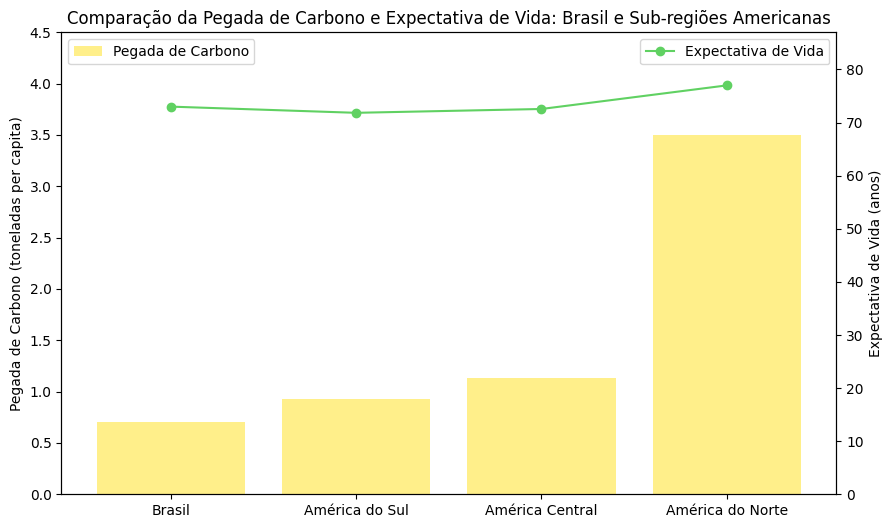

In [31]:

south_america = df[df['Region'] == 'South America']
central_america = df[df['Region'] == 'Central America/Caribbean']
north_america = df[df['Region'] == 'North America']
brazil = df[df['Country'] == 'Brazil']


south_america_avg_carbon = south_america['Carbon Footprint'].astype(float).mean()
south_america_avg_life = south_america['Life Exectancy'].astype(float).mean()

central_america_avg_carbon = central_america['Carbon Footprint'].astype(float).mean()
central_america_avg_life = central_america['Life Exectancy'].astype(float).mean()

north_america_avg_carbon = north_america['Carbon Footprint'].astype(float).mean()
north_america_avg_life = north_america['Life Exectancy'].astype(float).mean()

brazil_carbon = brazil['Carbon Footprint'].astype(float).values[0]
brazil_life = brazil['Life Exectancy'].astype(float).values[0]


regions = ['Brasil', 'América do Sul', 'América Central', 'América do Norte']
carbon_footprints = [brazil_carbon, south_america_avg_carbon, central_america_avg_carbon, north_america_avg_carbon]
life_expectancies = [brazil_life, south_america_avg_life, central_america_avg_life, north_america_avg_life]




fig, ax1 = plt.subplots(figsize=(10, 6))


ax1.bar(regions, carbon_footprints, color='#ffef8a', label='Pegada de Carbono')
ax1.set_ylabel('Pegada de Carbono (toneladas per capita)')
ax1.set_ylim(0, max(carbon_footprints) + 1)


ax2 = ax1.twinx()
ax2.plot(regions, life_expectancies, color='#60d162', marker='o', label='Expectativa de Vida')
ax2.set_ylabel('Expectativa de Vida (anos)')
ax2.set_ylim(0, max(life_expectancies) + 10)


plt.title('Comparação da Pegada de Carbono e Expectativa de Vida: Brasil e Sub-regiões Americanas')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

## Análises e Insights

###Pegada de Carbono:
O Brasil tem uma pegada de carbono relativamente baixa, assim como outras regiões da América Latina (América do Sul e América Central).

A América do Norte apresenta uma pegada de carbono significativamente mais alta, superando todas as outras regiões. Isso indica que países norte-americanos, como os Estados Unidos e o Canadá, possuem padrões de consumo e emissão de carbono mais intensivos, o que é geralmente associado a economias industrializadas e altos níveis de consumo energético.

###Expectativa de Vida:
A linha verde mostra que a expectativa de vida nas diferentes regiões analisadas é alta e varia de forma relativamente estável, com uma leve tendência de aumento ao se mover de América Central para América do Norte.

A América do Norte, apesar de ter a maior pegada de carbono, também apresenta uma das expectativas de vida mais altas. Isso pode sugerir uma correlação entre desenvolvimento econômico e qualidade de vida, ainda que às custas de um maior impacto ambiental.

###Contraste entre Pegada de Carbono e Expectativa de Vida:
Apesar de ter uma pegada de carbono relativamente baixa, o Brasil e outras regiões da América Latina ainda mantêm uma expectativa de vida próxima à da América do Norte, indicando que altos padrões de qualidade de vida podem ser alcançados com uma pegada ambiental menor.

Esse dado pode ser interpretado como uma oportunidade para países de alta pegada de carbono (como os da América do Norte) buscarem alternativas mais sustentáveis, já que algumas regiões conseguem sustentar uma boa qualidade de vida sem grandes emissões de carbono.
### Insight Final:
O Brasil apresenta uma biocapacidade que supera sua pegada de carbono, resultando em um superávit ecológico, em contraste com os EUA e a OCDE, que enfrentam déficits ecológicos. Este posicionamento único evidencia a importância de políticas para preservar recursos naturais e manter esse equilíbrio no longo prazo


# 4: Qual é a relação entre Pegada de Carbono, IDH e PIB no Brasil em comparação com os países de menor Pegada de Carbono?

### Analisaremos os dados do Brasil e dos países com MENOR Pegada de Carbono, relacionando Pegada de Carbono, IDH e PIB. Filtraremos os dados relevantes para identificar padrões e calcular correlações entre essas variáveis. Em seguida, criaremos gráficos comparativos para destacar como o Brasil se posiciona em relação a esses países com menores emissões nesses aspectos.

Brasil - IDH: 0.75, PIB per capita: 14739.0
Países com menor Pegada de Carbono - IDH médio: 0.52 (±0.07), PIB médio: 2914.68 (±1574.32)


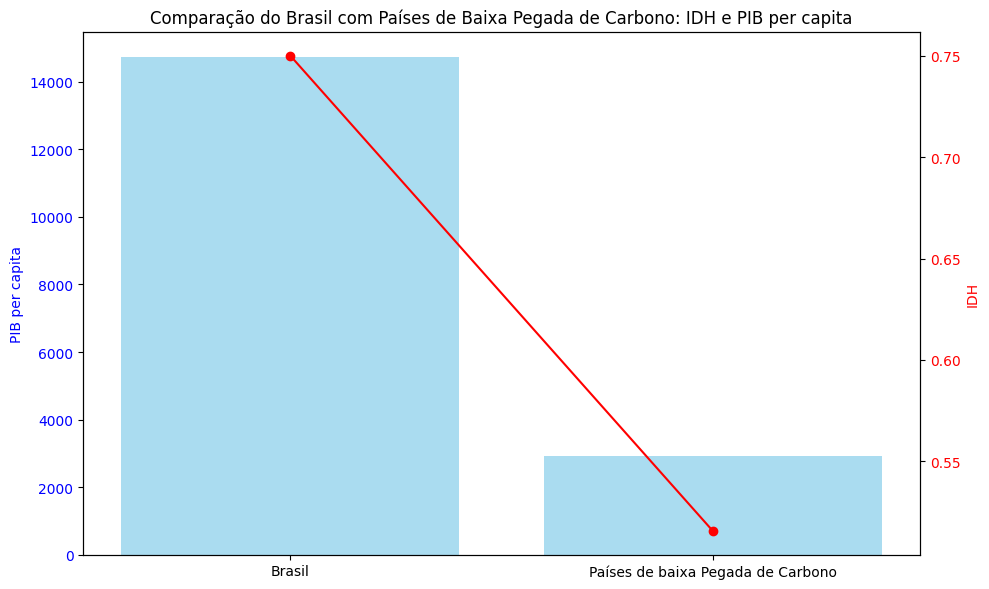

In [32]:

df = df[['Country', 'Carbon Footprint', 'HDI', 'Per Capita GDP']]


carbon_footprint_q1 = df['Carbon Footprint'].quantile(0.3)


low_carbon_countries = df[df['Carbon Footprint'] <= carbon_footprint_q1]


brasil_data = df[df['Country'] == 'Brazil']


low_carbon_hdi_mean = low_carbon_countries['HDI'].mean()
low_carbon_hdi_std = low_carbon_countries['HDI'].std()
low_carbon_gdp_mean = low_carbon_countries['Per Capita GDP'].mean()
low_carbon_gdp_std = low_carbon_countries['Per Capita GDP'].std()


brasil_hdi = brasil_data['HDI'].values[0]
brasil_gdp = brasil_data['Per Capita GDP'].values[0]


print(f"Brasil - IDH: {brasil_hdi}, PIB per capita: {brasil_gdp}")
print(f"Países com menor Pegada de Carbono - IDH médio: {low_carbon_hdi_mean:.2f} (±{low_carbon_hdi_std:.2f}), PIB médio: {low_carbon_gdp_mean:.2f} (±{low_carbon_gdp_std:.2f})")


labels = ['Brasil', 'Países de baixa Pegada de Carbono']
hdi_values = [brasil_hdi, low_carbon_hdi_mean]
gdp_values = [brasil_gdp, low_carbon_gdp_mean]

fig, ax1 = plt.subplots(figsize=(10, 6))


ax1.bar(labels, gdp_values, color='skyblue', alpha=0.7, label='PIB per capita')
ax1.set_ylabel('PIB per capita', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')


ax2 = ax1.twinx()
ax2.plot(labels, hdi_values, color='red', marker='o', label='IDH')
ax2.set_ylabel('IDH', color='red')
ax2.tick_params(axis='y', labelcolor='red')


plt.title('Comparação do Brasil com Países de Baixa Pegada de Carbono: IDH e PIB per capita')
fig.tight_layout()
plt.show()


## Análises e Insights

###PIB per capita:
O Brasil possui um PIB per capita de aproximadamente 14.739 USD, significativamente maior que o PIB per capita médio dos países de baixa pegada de carbono, que é em torno de 2.914,68 USD.

Essa diferença indica que os países com baixa pegada de carbono geralmente têm economias menos desenvolvidas em termos de produção econômica por pessoa, o que pode estar associado a menores níveis de industrialização e consumo, fatores que contribuem para uma menor pegada de carbono.

###IDH:
O Brasil tem um IDH de 0,75, enquanto o IDH médio dos países de baixa pegada de carbono é 0,52.

Esse valor mais baixo de IDH nos países de baixa pegada de carbono sugere que, além do menor desenvolvimento econômico, essas nações podem ter um acesso mais limitado a fatores que elevam a qualidade de vida, como educação, saúde e renda, refletindo diretamente em um IDH mais baixo.
###Insight Final:
A correlação positiva entre PIB per capita e pegada de carbono é evidente nos países da OCDE e nos EUA, mas no Brasil essa relação é menos acentuada. Isso sugere que o Brasil tem conseguido crescer economicamente sem aumentar proporcionalmente sua pegada de carbono, o que representa uma oportunidade de consolidar um modelo de desenvolvimento mais sustentável.


# 5: Qual é a relação entre Pegada de Carbono, IDH e PIB no Brasil em comparação com os países de maior Pegada de Carbono?

### Analisaremos os dados do Brasil e dos países com MAIOR Pegada de Carbono, relacionando Pegada de Carbono, IDH e PIB. Filtraremos as informações relevantes para calcular correlações entre essas variáveis e identificar padrões. Em seguida, criaremos gráficos comparativos para evidenciar como o Brasil se posiciona em relação aos países com maior Pegada de Carbono nesses aspectos.

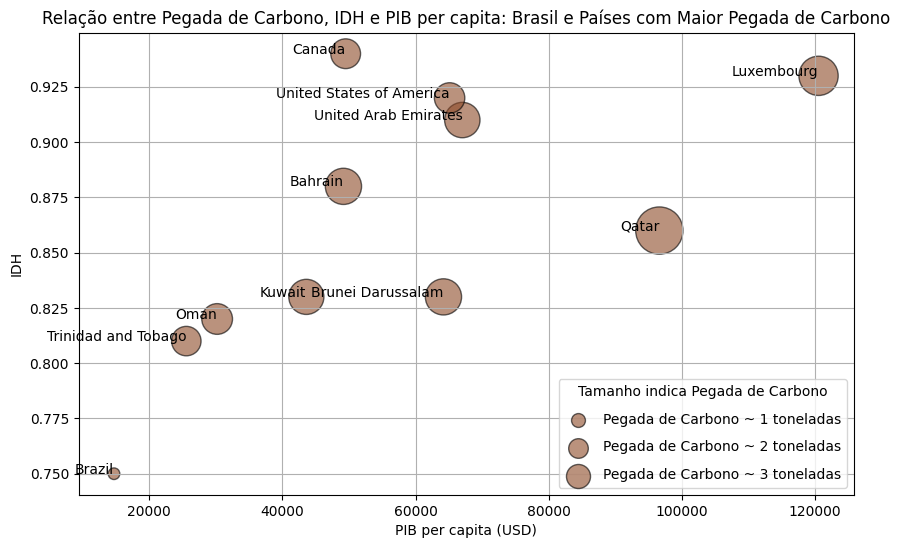

In [33]:

dados_top_pegada = df.sort_values(by='Carbon Footprint', ascending=False).head(10)
dados_brasil = df[df['Country'] == 'Brazil']


dados_comparacao = pd.concat([dados_brasil, dados_top_pegada])


dados_comparacao = dados_comparacao[['Country', 'Carbon Footprint', 'HDI', 'Per Capita GDP']]


plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    data=dados_comparacao,
    x='Per Capita GDP',
    y='HDI',
    s=dados_comparacao['Carbon Footprint'] * 100,
    alpha=0.6,
    c='#8c4927',
    edgecolor='k',
    label="_nolegend_"
)


for i, row in dados_comparacao.iterrows():
    plt.text(row['Per Capita GDP'], row['HDI'], row['Country'], ha='right')


plt.xlabel('PIB per capita (USD)')
plt.ylabel('IDH')
plt.title('Relação entre Pegada de Carbono, IDH e PIB per capita: Brasil e Países com Maior Pegada de Carbono')
plt.grid(True)

tamanho_legenda = [100, 200, 300]
for tamanho in tamanho_legenda:
    plt.scatter([], [], s=tamanho, color='#8c4927', alpha=0.6, edgecolor='k',
                label=f'Pegada de Carbono ~ {tamanho // 100} toneladas')

plt.legend(frameon=True, labelspacing=1, title="Tamanho indica Pegada de Carbono")


plt.grid(True)
plt.show()


## Análises e Insights

### PIB per capita e Pegada de Carbono:
 Em geral, há uma tendência de que países com maior PIB per capita também apresentem Pegadas de Carbono mais altas. Isso pode ser observado nos casos de Luxemburgo e Catar, que possuem altos PIBs per capita e também Pegadas de Carbono elevadas. O Brasil, por outro lado, tem um PIB per capita mais baixo e uma Pegada de Carbono significativamente menor em comparação com esses países.
 ### IDH e Pegada de Carbono:
 Muitos dos países com alto IDH também apresentam Pegadas de Carbono elevadas. O Canadá, os Estados Unidos e o Luxemburgo são exemplos de países com altos índices de desenvolvimento humano e uma alta Pegada de Carbono, sugerindo que países mais desenvolvidos em termos de qualidade de vida tendem a consumir mais recursos e, portanto, gerar mais emissões de carbono.
 ### Brasil versus Países de Alta Pegada de Carbono:
 O Brasil possui um IDH inferior e um PIB per capita consideravelmente menor em comparação com os países listados no gráfico, como o Luxemburgo e o Catar. Isso indica que, embora o Brasil tenha um impacto ambiental relevante, ele está em um nível de desenvolvimento econômico e humano mais baixo em comparação com os países com maior Pegada de Carbono.
 ### Luxemburgo e Catar como Outliers:
 Esses dois países estão destacados com os maiores PIBs per capita e altas Pegadas de Carbono, sugerindo uma relação forte entre desenvolvimento econômico e emissões. No entanto, eles têm perfis distintos — enquanto o Luxemburgo é uma economia europeia desenvolvida, o Catar é uma economia rica em petróleo, o que indica que diferentes modelos de desenvolvimento podem gerar altas emissões.
###Insight Final:
Os fatores que mais contribuem para o déficit ecológico do Brasil estão relacionados ao uso da terra e ao desmatamento, enquanto nos EUA e na OCDE as emissões de carbono predominam. Isso mostra que o Brasil deve concentrar esforços na proteção de florestas e práticas agrícolas sustentáveis para evitar futuros desequilíbrios ecológicos.



# 6: O Brasil está alinhado com a pegada de carbono dos países da OCDE e do continente americano, considerando o mesmo nível de desenvolvimento econômico?

### Label/Tag para o treinamento: A Pegada de Carbono será o alvo direto para a regressão. Para a classificação, categorizaremos os países em níveis de pegada de carbono ajustados pelo PIB per capita (baixo, médio, alto).

### Esta questão foca na análise da Pegada de Carbono do Brasil em relação à OCDE e ao continente americano, mas controlando pelo nível de desenvolvimento que utilizamos: PIB per Capita

In [35]:

def classify_region(country):
    if country == "Brazil":
        return "Brasil"
    elif country in ocde_countries:
        return "OCDE"
    elif country in ["United States of America"]:
        return "EUA"
    elif country in ["Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Paraguay", "Peru", "Uruguay", "Venezuela"]:
        return "América do Sul"
    elif country in ["Belize", "Costa Rica", "El Salvador", "Guatemala", "Honduras", "Nicaragua", "Panama"]:
        return "América Central"
    else:
        return "Outros"


df['Região'] = df['Country'].apply(classify_region)

df_filtered = df.dropna(subset=['Carbon Footprint', 'Per Capita GDP'])
df_filtered = df_filtered[df_filtered['Per Capita GDP'] != 0]


df_filtered = df_filtered[df_filtered['Região'].isin(["Brasil", "OCDE", "EUA", "América Central", "América do Sul"])]


df_filtered['carbon_level'] = pd.qcut(
    df_filtered['Carbon Footprint'] / df_filtered['Per Capita GDP'],
    3, labels=['baixo', 'médio', 'alto']
)


X = df_filtered[['Per Capita GDP']]
y = df_filtered['carbon_level']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print("Classificação dos níveis de Pegada de Carbono ajustados ao PIB per capita:")
print(classification_report(y_test, y_pred))

Classificação dos níveis de Pegada de Carbono ajustados ao PIB per capita:
              precision    recall  f1-score   support

        alto       0.50      0.33      0.40         3
       baixo       0.22      0.67      0.33         3
       médio       0.50      0.14      0.22         7

    accuracy                           0.31        13
   macro avg       0.41      0.38      0.32        13
weighted avg       0.44      0.31      0.29        13



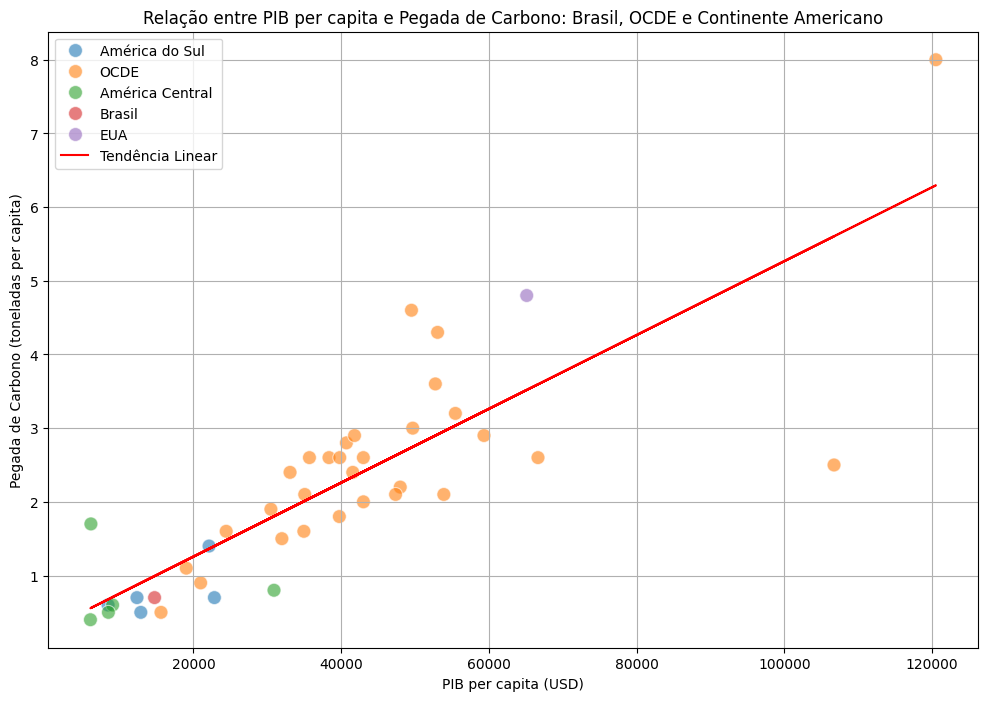

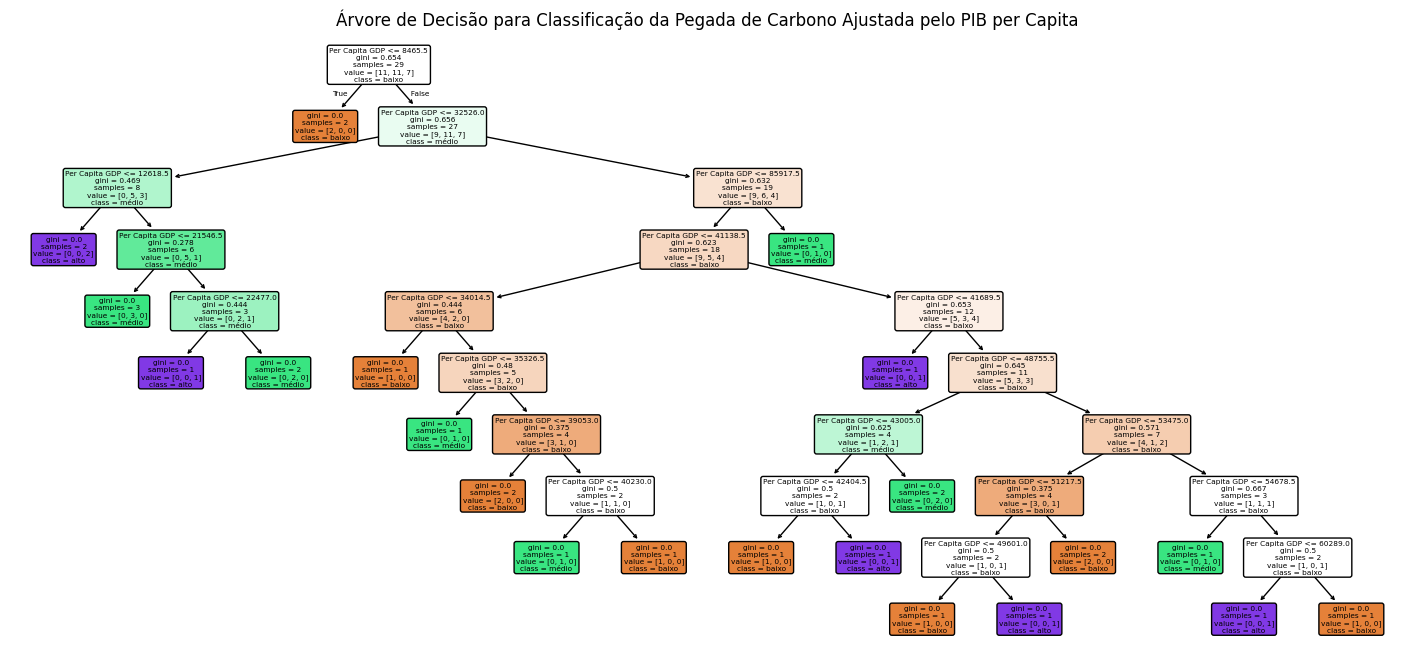

In [36]:

X = df_filtered[['Per Capita GDP']]
y = df_filtered['Carbon Footprint']

model = LinearRegression()
model.fit(X, y)

y_pred_line = model.predict(X)

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_filtered, x='Per Capita GDP', y='Carbon Footprint', hue='Região', s=100, alpha=0.6)

plt.plot(df_filtered['Per Capita GDP'], y_pred_line, color='red', label="Tendência Linear")

plt.xlabel("PIB per capita (USD)")
plt.ylabel("Pegada de Carbono (toneladas per capita)")
plt.title("Relação entre PIB per capita e Pegada de Carbono: Brasil, OCDE e Continente Americano")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(18, 8))

plot_tree(clf,
          feature_names=['Per Capita GDP'],
          class_names=['baixo', 'médio', 'alto'],
          filled=True,
          rounded=True)

plt.title("Árvore de Decisão para Classificação da Pegada de Carbono Ajustada pelo PIB per Capita")
plt.show()

## Análise e Insights

### Gráfico de Dispersão: Relação entre PIB per capita e Pegada de Carbono
Esse gráfico mostra uma correlação positiva entre o PIB per capita e a pegada de carbono. Em geral, à medida que o PIB per capita aumenta, a pegada de carbono per capita também tende a aumentar. Isso indica que países com economias mais ricas tendem a consumir mais recursos e, consequentemente, geram uma pegada de carbono maior.

Brasil aparece com um PIB per capita moderado e uma pegada de carbono relativamente baixa em comparação com outros países da OCDE e dos EUA.

EUA apresenta um dos maiores PIBs per capita e também uma das maiores pegadas de carbono, destacando uma alta intensidade de consumo e impacto ambiental.

OCDE: A maioria dos pontos da OCDE está acima da média em termos de PIB per capita e pegada de carbono, reforçando que esses países tendem a consumir mais recursos.

Esse padrão sugere que políticas de redução de pegada de carbono devem levar em conta o nível econômico das nações, uma vez que os países de alta renda tendem a contribuir mais para a pegada de carbono global.
### Árvore de Decisão para Classificação da Pegada de Carbono Ajustada pelo PIB per Capita
Este gráfico apresenta uma árvore de decisão que classifica os países em diferentes categorias de pegada de carbono (baixo, médio, alto) com base no PIB per capita.

Classificação de baixo: Países com PIB per capita mais baixo tendem a ter uma pegada de carbono classificada como "baixo".

Classificação média: Países com PIB per capita moderado geralmente são classificados com pegada de carbono "médio".

Classificação alta: Países de alto PIB per capita são classificados com pegada de carbono "alto".

Essa árvore de decisão oferece um modelo de aprendizado de máquina que pode ser útil para prever a pegada de carbono de uma nação com base em seu PIB per capita, mostrando como o crescimento econômico está relacionado com o impacto ambiental. Essa abordagem pode ser expandida para avaliar a eficácia de políticas públicas ao ajustar o desenvolvimento econômico para minimizar a pegada ambiental.
### Insight Final:
O impacto do crescimento urbano no Brasil sobre a pegada de carbono é notável, embora seja mais moderado em comparação aos países da OCDE, devido ao uso de fontes renováveis e biocombustíveis. Esses resultados indicam que o Brasil deve continuar investindo em infraestrutura verde e políticas urbanas para conter aumentos nas emissões.



# 7: Como a Pegada de Carbono per capita do Brasil se compara com a dos países da OCDE, considerando a relação entre IDH (HDI) e População?

### Filtraremos os dados do Brasil e dos países da OCDE para analisar a Pegada de Carbono per capita, o IDH (HDI) e a População. Calcularemos as médias e criaremos gráficos para explorar como esses indicadores estão relacionados, destacando como o Brasil se posiciona em comparação aos países da OCDE em termos de emissões por habitante e desenvolvimento humano.

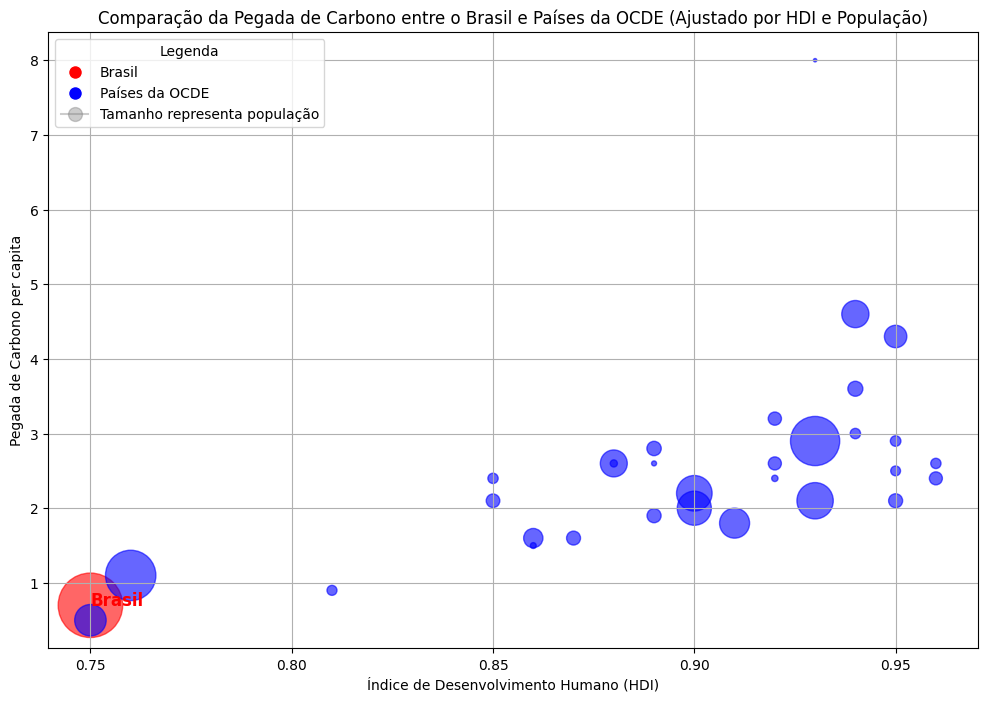

In [42]:

brasil_data = df[df['Country'] == 'Brazil']
ocde_data = df[df['Country'].isin(ocde_countries)]


data_comparacao = pd.concat([brasil_data, ocde_data])


plt.figure(figsize=(12, 8))
plt.scatter(
    data_comparacao['HDI'],
    data_comparacao['Carbon Footprint'],
    s=data_comparacao['Population (millions)'] * 10,
    c=['red' if country == 'Brazil' else 'blue' for country in data_comparacao['Country']],
    alpha=0.6
)


plt.text(
    brasil_data['HDI'].values[0],
    brasil_data['Carbon Footprint'].values[0],
    'Brasil',
    fontsize=12, color='red', weight='bold'
)


from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Brasil', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Países da OCDE', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='gray', label='Tamanho representa população', markersize=10, markerfacecolor='gray', alpha=0.4)
]

plt.legend(handles=legend_elements, loc='upper left', title="Legenda")


plt.xlabel('Índice de Desenvolvimento Humano (HDI)')
plt.ylabel('Pegada de Carbono per capita')
plt.title('Comparação da Pegada de Carbono entre o Brasil e Países da OCDE (Ajustado por HDI e População)')

# Exibir o gráfico
plt.grid(True)
plt.show()

## Análise e Insights
O gráfico acima compara a pegada de carbono per capita com o Índice de Desenvolvimento Humano (HDI) entre o Brasil e países da OCDE (Organização para a Cooperação e Desenvolvimento Econômico). A análise leva em conta a população de cada país, representada pelo tamanho das bolhas. Alguns pontos a destacar:
### Posição do Brasil:
O Brasil é representado pela bolha vermelha no canto inferior esquerdo do gráfico, com um HDI próximo de 0,75 e uma pegada de carbono per capita ligeiramente abaixo de 1.

A posição do Brasil indica um HDI moderado e uma pegada de carbono relativamente baixa em comparação com os países da OCDE.
### Países da OCDE:
Os países da OCDE, representados em azul, têm uma distribuição mais ampla no gráfico, com HDIs que variam de cerca de 0,80 a 0,95.

A maioria dos países da OCDE apresenta uma pegada de carbono per capita mais alta do que o Brasil, variando de aproximadamente 1 a mais de 8. Esse aumento da pegada de carbono parece estar correlacionado com o aumento do HDI.
###Correlação entre HDI e Pegada de Carbono:
Observa-se uma tendência de que, à medida que o HDI aumenta, a pegada de carbono per capita também tende a ser maior. Isso sugere uma correlação entre o desenvolvimento humano e o consumo de recursos (representado pela pegada de carbono), o que é comum em países mais desenvolvidos.
### Impacto da População:
O tamanho das bolhas indica que países mais populosos também apresentam uma diversidade na pegada de carbono. Países com HDI elevado, mas de população maior, como alguns membros da OCDE, têm bolhas maiores e, em geral, pegadas de carbono mais altas.
###Insight Final:
A relação entre IDH e pegada de carbono evidencia que o Brasil atinge níveis de desenvolvimento humano elevados com uma pegada de carbono mais baixa em comparação aos países da OCDE e aos EUA. Isso demonstra que o Brasil pode servir como exemplo de que é possível alcançar progresso humano sem necessariamente aumentar as emissões de carbono na mesma proporção.




#8: Como a pegada ecológica do Brasil em diferentes atividades (agricultura, pastagem, produtos florestais e emissões de carbono) se compara com a média das regiões do continente americano (América do Norte, América do Sul e América Central)?

### Filtraremos os dados do Brasil e das regiões do continente americano (América do Norte, América do Sul e América Central). Calcularemos as médias das pegadas ecológicas para cada atividade (agricultura, pastagem, produtos florestais e emissões de carbono) e para cada região. Em seguida, criaremos um gráfico comparativo para facilitar a visualização das diferenças entre o Brasil e as regiões analisadas.

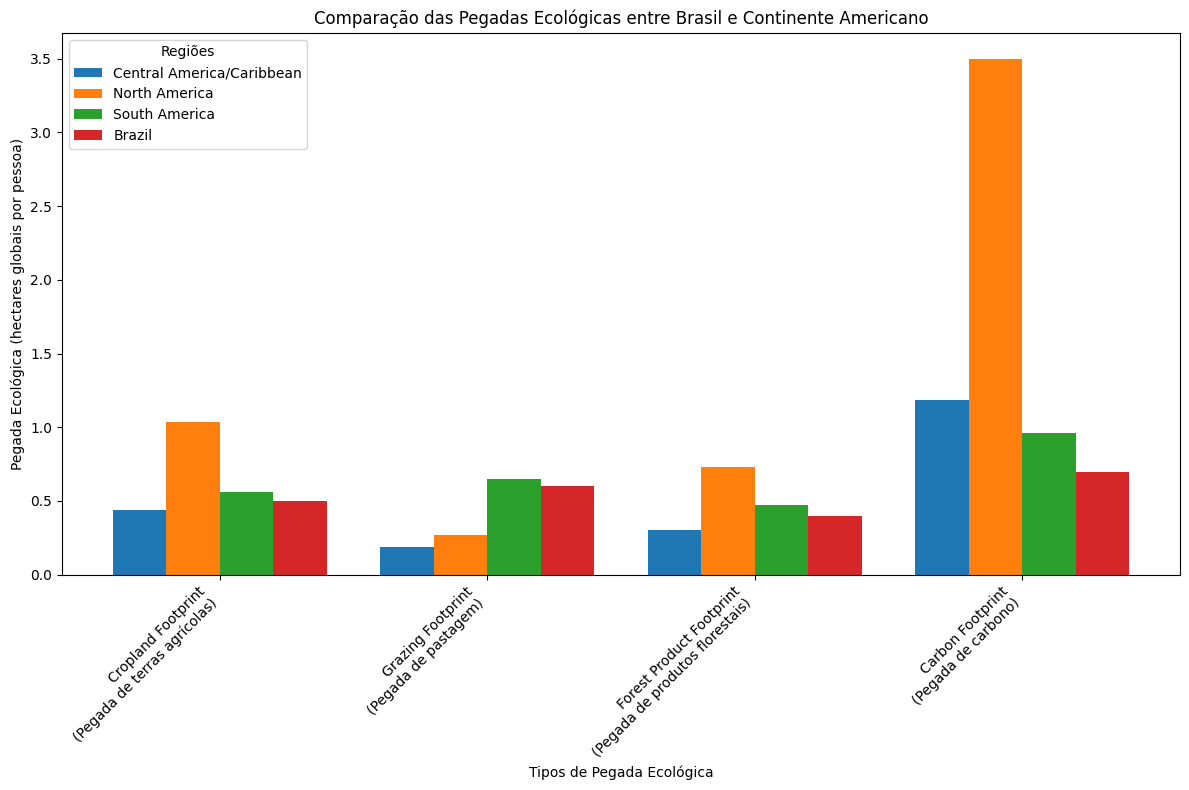

In [43]:

brasil = df_cleaned[df_cleaned['Country'] == 'Brazil']
americas = df_cleaned[df_cleaned['Region'].isin(['North America', 'South America', 'Central America/Caribbean'])]

regions_means = americas.groupby('Region')[['Cropland Footprint', 'Grazing Footprint',
                                            'Forest Product Footprint', 'Carbon Footprint']].mean()

regions_means.loc['Brazil'] = brasil[['Cropland Footprint', 'Grazing Footprint',
                                      'Forest Product Footprint', 'Carbon Footprint']].values[0]


fig, ax = plt.subplots(figsize=(12, 8))


categories = ['Cropland Footprint\n(Pegada de terras agrícolas)',
              'Grazing Footprint\n(Pegada de pastagem)',
              'Forest Product Footprint\n(Pegada de produtos florestais)',
              'Carbon Footprint\n(Pegada de carbono)']
x = np.arange(len(categories))
width = 0.2


for i, (region, row) in enumerate(regions_means.iterrows()):
    ax.bar(x + i * width, row, width, label=region)


ax.set_xlabel('Tipos de Pegada Ecológica')
ax.set_ylabel('Pegada Ecológica (hectares globais por pessoa)')
ax.set_title('Comparação das Pegadas Ecológicas entre Brasil e Continente Americano')
ax.set_xticks(x + width * (len(regions_means) - 1) / 2)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend(title='Regiões')

plt.tight_layout()
plt.show()

## Análise e Insights
O gráfico apresenta a comparação das pegadas ecológicas em quatro categorias — "Cropland Footprint" (Pegada de terras agrícolas), "Grazing Footprint" (Pegada de pastagem), "Forest Product Footprint" (Pegada de produtos florestais) e "Carbon Footprint" (Pegada de carbono) — entre o Brasil e as regiões da América do Norte, América Central/Caribe e América do Sul.

### Pegada de Terras Agrícolas (Cropland Footprint):

A América do Norte apresenta a maior pegada para terras agrícolas, seguida pela América do Sul.

O Brasil possui uma pegada semelhante à média da América do Sul, sendo maior que a da América Central/Caribe, mas significativamente menor que a da América do Norte.

### Pegada de Pastagem (Grazing Footprint):
O Brasil apresenta uma pegada de pastagem ligeiramente menor do que a média da América do Sul, mas maior do que as médias da América Central/Caribe e América do Norte.

Isso reflete o papel da pecuária no Brasil, que, embora expressivo, é mais eficiente ou ocupa menos espaço per capita comparado a outras áreas da América do Sul.
### Pegada de Produtos Florestais (Forest Product Footprint):
A América do Norte apresenta a maior pegada nessa categoria, destacando seu grande consumo de produtos derivados de florestas.

O Brasil e a América do Sul têm valores comparáveis e estão acima da América Central/Caribe.
### Pegada de Carbono (Carbon Footprint):
A América do Norte domina amplamente essa categoria, evidenciando seu alto consumo de combustíveis fósseis e estilo de vida com alta emissão per capita.

O Brasil possui uma pegada de carbono comparável à média da América do Sul, sendo maior que a da América Central/Caribe, mas muito inferior à da América do Norte.
###Insight Final:
Adotar padrões de uso da terra e consumo energético semelhantes aos da OCDE ou EUA resultaria em um aumento significativo da pegada de carbono do Brasil, comprometendo seu atual superávit ecológico. Esses resultados reforçam a necessidade de políticas que preservem as práticas sustentáveis brasileiras enquanto buscam soluções tecnológicas inovadoras para o desenvolvimento econômico.


# 9: Como o Déficit ou Reserva Ecológica e a Pegada de Carbono per capita do Brasil se comparam com os dos Estados Unidos, considerando a sustentabilidade ambiental e o impacto das emissões de carbono?

### Filtraremos os dados do Brasil e dos Estados Unidos relacionados ao Déficit ou Reserva Ecológica e à Pegada de Carbono per capita. Calcularemos as médias e tendências para ambos os países ao longo do tempo. Em seguida, criaremos gráficos comparativos para destacar as diferenças e os impactos das emissões de carbono na sustentabilidade ambiental de cada país.

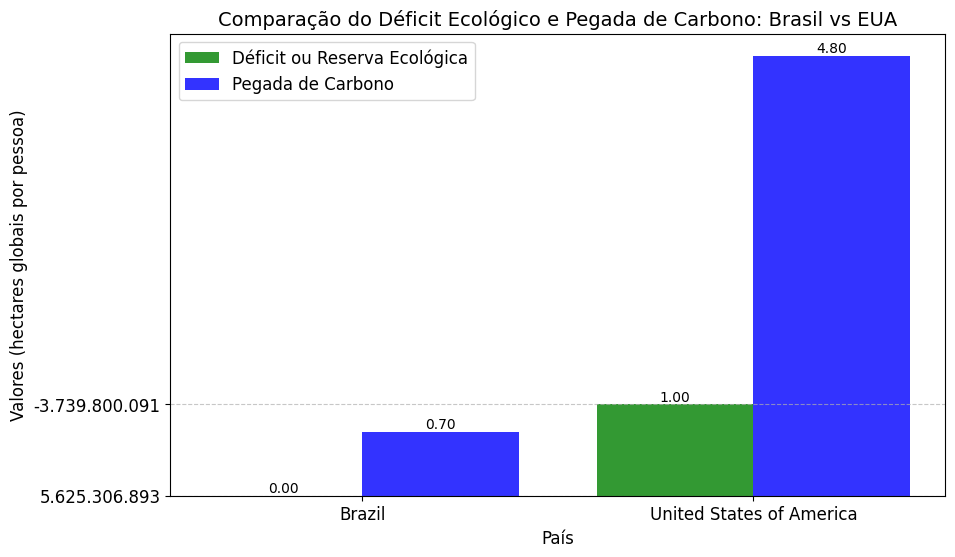

In [44]:

countries_to_compare = ['Brazil', 'United States of America']
filtered_df = df[df['Country'].isin(countries_to_compare)]

comparison_df = filtered_df[['Country', 'Ecological (Deficit) or Reserve', 'Carbon Footprint']]

countries = comparison_df['Country']
ecological_deficit_reserve = comparison_df['Ecological (Deficit) or Reserve']
carbon_footprint = comparison_df['Carbon Footprint']


x = np.arange(len(countries))
width = 0.4


plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width/2, ecological_deficit_reserve, width, label='Déficit ou Reserva Ecológica', color='green', alpha=0.8)
bars2 = plt.bar(x + width/2, carbon_footprint, width, label='Pegada de Carbono', color='blue', alpha=0.8)


for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10, color='black')

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10, color='black')


plt.title('Comparação do Déficit Ecológico e Pegada de Carbono: Brasil vs EUA', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Valores (hectares globais por pessoa)', fontsize=12)
plt.xticks(x, countries, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()

## Análise e Insight
O gráfico apresenta a comparação entre o Déficit ou Reserva Ecológica e a Pegada de Carbono per capita do Brasil e dos Estados Unidos.

### Déficit ou Reserva Ecológica
O Brasil possui uma reserva ecológica positiva de aproximadamente 5,63 hectares globais por pessoa, indicando que sua biocapacidade excede a pegada ecológica total da população. Isso reflete a grande quantidade de recursos naturais disponíveis no país em relação ao seu consumo.

Os Estados Unidos, por outro lado, apresentam um déficit ecológico de aproximadamente -3,74 hectares globais por pessoa, o que significa que o país consome recursos naturais muito além de sua capacidade de regeneração. Esse déficit é típico de nações com alto consumo e impacto ambiental.
### Pegada de Carbono per capita
A Pegada de Carbono per capita dos Estados Unidos é de 4,80 hectares globais por pessoa, destacando seu elevado nível de emissões de carbono, que reflete um padrão de consumo intensivo em combustíveis fósseis, alta industrialização e dependência de transporte individual.

No caso do Brasil, a Pegada de Carbono é significativamente menor, em 0,70 hectares globais por pessoa, o que se deve a fatores como a maior participação de fontes renováveis na matriz energética (ex.: hidrelétricas) e um estilo de vida com menor intensidade de consumo de carbono.
### Contraste entre Brasil e EUA
O contraste entre os dois países evidencia que, enquanto o Brasil se destaca positivamente na dimensão ecológica (reserva), os EUA enfrentam desafios significativos em sustentabilidade devido ao elevado déficit ecológico e alta Pegada de Carbono.

Apesar disso, o Brasil ainda precisa investir na redução de sua Pegada de Carbono para sustentar um modelo de desenvolvimento mais sustentável, principalmente em setores como desmatamento e transporte.
###Insight Final:
As mudanças na pegada de carbono do Brasil têm um impacto direto no número de "Terras" necessárias para sustentar seu consumo. Atualmente, o Brasil está em uma posição relativamente sustentável em comparação ao cenário global, mas o crescimento desordenado da pegada de carbono poderia aproximá-lo dos padrões de déficit observados em países desenvolvidos.





#  10: Como a Pegada de Carbono e o Índice de Desenvolvimento Humano (HDI) do Brasil se correlacionam em comparação com a média global faça o código dessa questão pra mim ?

### Filtraremos os dados do Brasil e os dados globais para comparar a Pegada de Carbono e o Índice de Desenvolvimento Humano (HDI). Calcularemos as médias globais da Pegada de Carbono e do HDI. Em seguida, criaremos um gráfico que ilustra essas duas variáveis lado a lado, mostrando a relação entre elas para o Brasil e a média global. Também adicionaremos os valores das métricas diretamente no gráfico para facilitar a análise.

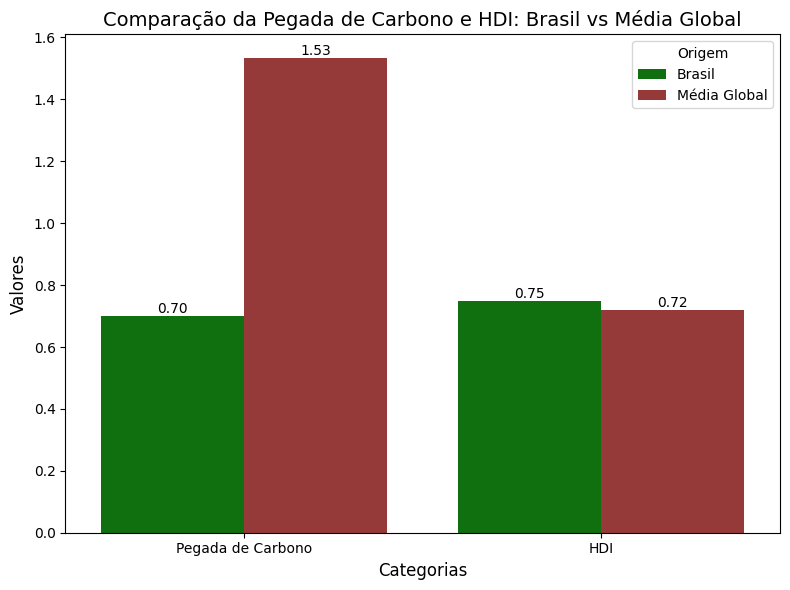

In [48]:

brazil_data = df[df["Country"] == "Brazil"]
global_data = df.mean(numeric_only=True)


brazil_carbon = brazil_data["Carbon Footprint"].values[0]
brazil_hdi = brazil_data["HDI"].values[0]


global_carbon = global_data["Carbon Footprint"]
global_hdi = global_data["HDI"]


categories = ["Pegada de Carbono", "HDI"]
brazil_values = [brazil_carbon, brazil_hdi]
global_values = [global_carbon, global_hdi]

data_barplot = pd.DataFrame({
    "Categoria": ["Pegada de Carbono", "HDI"] * 2,
    "Valores": [brazil_carbon, brazil_hdi, global_carbon, global_hdi],
    "Origem": ["Brasil", "Brasil", "Média Global", "Média Global"]
})

# Criar o barplot
plt.figure(figsize=(8, 6))
sns.barplot(
    x="Categoria",
    y="Valores",
    hue="Origem",
    data=data_barplot,
    palette={"Brasil": "green", "Média Global": "brown"}
)

# Adicionar rótulos nos valores das barras
for container in plt.gca().containers:
    plt.bar_label(container, fmt="%.2f", label_type="edge", fontsize=10)

# Personalizações do Gráfico
plt.title("Comparação da Pegada de Carbono e HDI: Brasil vs Média Global", fontsize=14)
plt.xlabel("Categorias", fontsize=12)
plt.ylabel("Valores", fontsize=12)
plt.legend(title="Origem", fontsize=10)
plt.tight_layout()

plt.show()

## Análises e Insights

### Pegada de Carbono
A Pegada de Carbono per capita no Brasil é significativamente menor que a média global.
O Brasil apresenta um valor de 0.70, enquanto a média global é 1.53. Isso sugere que, em termos relativos, o Brasil contribui menos para as emissões de carbono per capita do que o restante do mundo, possivelmente devido a fatores como a matriz energética mais limpa (hidrelétrica) e menor industrialização intensiva em carbono.

### Índice de Desenvolvimento Humano (HDI)
O HDI do Brasil (0.75) é ligeiramente superior à média global (0.72).
Isso indica que, apesar da pegada de carbono reduzida, o Brasil mantém um nível de desenvolvimento humano acima da média global, sugerindo que o país consegue combinar melhor desempenho ambiental com qualidade de vida.

### Interpretação Geral
A diferença substancial na Pegada de Carbono reflete uma vantagem ambiental do Brasil, mas pode também ser atribuída a limitações econômicas ou diferenças de infraestrutura em comparação com países de maior pegada per capita.
O desempenho do Brasil em HDI, acima da média global, demonstra uma capacidade de oferecer qualidade de vida sem depender de altas emissões de carbono.

### Insight Final:
Seguir tendências de pegada de carbono dos países da OCDE e dos EUA levaria o Brasil a enfrentar déficits ecológicos no futuro, o que contrasta com seu atual superávit. Isso destaca a importância de implementar políticas públicas que consolidem o desenvolvimento sustentável e mantenham o equilíbrio entre consumo e biocapacidade.

# Conclusão Final
### Esse projeto proporcionou uma análise detalhada das relações entre a pegada de carbono, desenvolvimento socioeconômico e outros fatores estruturais, com foco especial no Brasil em comparação com outras nações e blocos econômicos, como os EUA, a OCDE e o continente americano.
Os resultados demonstram que:

### *Comparação da Pegada de Carbono:* O Brasil possui uma pegada de carbono significativamente menor que a média dos países da OCDE e dos EUA. Essa diferença reflete características estruturais da economia brasileira, como sua matriz energética mais limpa, dominada por fontes renováveis, e uma menor dependência de combustíveis fósseis. No entanto, em comparação ao continente americano, o Brasil apresenta uma pegada de carbono mais proporcional, destacando sua relevância regional.

### *Contribuição Relativa na Pegada Ecológica:* A pegada de carbono é um componente importante da pegada ecológica total do Brasil, mas sua contribuição percentual é inferior à observada nos EUA e na OCDE. Isso reforça que outros fatores, como o uso da terra, também têm peso significativo na sustentabilidade do Brasil.

### *Biocapacidade versus Pegada de Carbono:* O Brasil apresenta um superávit ecológico, graças à sua ampla biocapacidade. Contudo, pressões crescentes de urbanização, desmatamento e mudanças no uso da terra podem comprometer esse equilíbrio no futuro, aproximando o país de padrões de déficit ecológico observados em economias avançadas.

### *Correlação entre PIB per capita e Pegada de Carbono:* Existe uma correlação positiva entre o PIB per capita e a pegada de carbono, especialmente em economias desenvolvidas. No Brasil, essa relação é menos intensa, sugerindo que o crescimento econômico não tem sido necessariamente acompanhado por aumentos proporcionais na pegada de carbono, o que reflete avanços em políticas de sustentabilidade e uso de fontes renováveis.

### *Impacto do Nível de Urbanização:* A urbanização no Brasil tem impacto direto na pegada de carbono, devido ao aumento no consumo de energia e transporte. Porém, os números ainda são mais moderados em relação à OCDE, em parte pelo uso de biocombustíveis e hidrelétricas.

### *Cenários Futuros e Adaptação:* Caso o Brasil adotasse padrões de uso da terra e consumo energético semelhantes aos da OCDE ou EUA, sua pegada de carbono aumentaria significativamente, colocando em risco o atual equilíbrio ecológico. Por outro lado, a adoção de tecnologias limpas e práticas sustentáveis da OCDE poderia servir como exemplo para evitar esse cenário.

### *Projeção e Sustentabilidade:* Se o Brasil continuar no ritmo atual de desenvolvimento econômico e aumento de sua pegada de carbono, ele ainda estará em melhor situação ecológica em comparação com os padrões da OCDE e EUA. No entanto, políticas públicas efetivas são essenciais para manter a liderança sustentável global.

### Considerações Finais: O Brasil está em uma posição singular, com grandes vantagens na biocapacidade e uma matriz energética limpa. No entanto, os desafios para equilibrar desenvolvimento econômico e sustentabilidade ambiental são iminentes. O país pode se beneficiar de políticas que incentivem o crescimento econômico sustentável, utilizando sua rica biocapacidade de forma estratégica para garantir qualidade de vida às gerações futuras, enquanto mantém seu compromisso com os objetivos globais de sustentabilidade.


# Refêrencias


  - Kaggle: https://www.kaggle.com
  - OCDE: https://www.oecd.org/en.html
  - UNEP: https://www.unep.org/pt-br
  - IPCC: https://www.ipcc.ch
  - Scikit-learn: https://scikit-learn.org/stable/
  - Pandas: https://pandas.pydata.org
  - Seaborn: https://seaborn.pydata.org/
  - NumPy: https://numpy.org/
  - Matplotlib: https://matplotlib.org/
  - Python: https://www.python.org
  
